
#  Sequential Subspace Optimization Method for Large-Scale Unconstrained Problems
## (ECE 602 Final Project)

## Table of Contents
* [Introduction](#first-bullet)
* [SESOP (Sequential Subspace Optimization)](#second-bullet)
* [Fast SESOP](#third-bullet)
* [Newton method](#forth-bullet)
* [Modified Newton method](#fifth-bullet)
* [Implementation details](#sixth-bullet)
* [References](#seventh-bullet)

## Introduction <a class="anchor" id="first-bullet"></a>

Cosider the function $f$ is the objective we want to minimize over all $x$, belonging to $R^n$. When the number of variables is very large, let say $n$ is greater than $10^4$ and more, we need 
 for a optimization algorithm, for which storage requirement and computational cost per iteration grow not more than linearly in $n$.  Conjugate gradient (CG) method  is one the first methods which was proposed to tackle computational costs. It is known that CG worst case
convergence rate for quadratic problems. However, CG to nonlinear
functions is not  worstcase optimal. In the paper, a method is presented ,which is equivalent to CG in the quadratic case, and often outperforms CG and Trancated Newton (TN) in non-quadratic case, while preserving worst-case optimality.

This method is used for large scale unconstraint optimization problems, in which at each iteration the minimum of the objective function is searched over a subspace spanned by the current gradient and by directions of few previous steps.


## SESOP (Sequential Subspace Optimization) <a class="anchor" id="second-bullet"></a>

In this section we describe the SESOP algorithm, which is a general method for
smooth unconstrained optimization.  Generaly, in this algorithms , we minimize the objective function $f$ in a subsapace of $R^n$ at each iteration($k$). This subspace is constructed using the points $x_{k-1}, x_{k-2},...,x_{k-M}$  from previous iterations. Also, the gradient of $f$ (g^k) at point $x_k$ beside two Nemrowski directios are used to biuld the subspace. 


To construct the subspace, following steps need to be done at each iteration($k$):




$min\:\:f(x) \:\:\: where f\:\:is\:\:smooth$



$1.\:\: g^k = \nabla f(x^k)$


$2.\:\:  d^{k-1} = x^k - x^{k-1}$



$3.\:\:  P^k = (g^k|d^{k-1}...d^{k-M})$



$4.\:\:\alpha ^k = argmin\:\:f(x^k+P \alpha)$



$5. \:\:x^{k+1}=x^k+P\alpha ^k$


$6. \:\: update \:\:matrix\:\: P\:\: with \:\:new \:\:directios$


In step six, optimization is done on the subspace which is spanned by the column of matrix $P^k$. Note that the number of the columns of matrix $P^k$ is $M$ which is much smaller than original space dimenstion, $n$. To do the optimization on this subsapce, we are looking for a $\alpha$ which minimize $f(x^k+ P\alpha)$. This optimization can be done using Newton ,Truncated Newton(TN), CG or even exact line search method. Newton method will be explained in the sections below.



## Fast SESOP <a class="anchor" id="third-bullet"></a>

In some applications:

\begin{equation}
f(x)=\Phi (Ax)
\end{equation}

where, $\Phi$ is cheap to compute, but $Ax$ is expensive to compute, but

\begin{equation}
f(x^k+P\alpha)+\Phi(Ax^k+AP\alpha), \:\:\: AP = R
\end{equation}

Hence, in each iteration we only need to compute $Ax$ once. Furthermore, for each $x^k$, we change only two columns of P. Considering $Ax^{k+1}=Ax+Rx^k$, we do not need to compute $Ax^{k+1}$ for each k, just update it. We can compute it directly in each let say 10 iteration. Therefore, if

\begin{equation}
argmin\:\:||Ac-y||^2 + \mu _0 * smooth\_function(c)
\end{equation}

Then,
\begin{equation}
\nabla _\alpha \Phi(Ax^k+R\alpha) = R^T\nabla _u\Phi(u) \Longrightarrow Gradient
\end{equation}

\begin{equation}
\nabla ^2 _{\alpha \alpha} \Phi(Ax^k+R\alpha) = R^T\nabla ^2 _{uu}\Phi(u)R \Longrightarrow Hessian
\end{equation}

\begin{equation}
x^{k+1}=x^k+\alpha ^kd^k,\:\:f'\:^k_d(x^k)\:<0\:\:or\:\: <\nabla f(x^k),d^k>\:\:<0
\end{equation}


## Newton method <a class="anchor" id="forth-bullet"></a>
In this method, to find the best direction $d$ in order to optimize function $f$ around point $x^k$, Teilor exanstion is applied.

\begin{equation}
f(x_k,d) \cong f(x_k) + d^Tg(x_k) + \frac{1}{2}d^TH(x_k)d
\end{equation}

Define:

\begin{equation}
S(d) = d^Tg(x_k) + \frac{1}{2}d^TH(x_k)d
\end{equation}

Then:

\begin{equation}
\nabla S(d) = 0
\end{equation}

So we will have:

\begin{equation}
g^k + H^kd = 0
\end{equation}

\begin{equation}
H^kd = -g^k
\end{equation}

## Modified Newton method <a class="anchor" id="fifth-bullet"></a>

In Newton method we have:

\begin{equation}
d^k = -H^{k^{-1}}g^k
\end{equation}

To find the minumum value of $f$ in direction $d$ and around point $x^k$, line search method can be applied. In 'Line search' method,  we would like our direction to be direction of descent:

\begin{equation}
\Longrightarrow f'_{d^k}=<f',d^k>\:\:<0\:\:\Longrightarrow \:\:g^{k^T}H^{k^{-1}}g^k\:\:>0
\end{equation}

Therefore $H^{k^{-1}}$ or $H^k$ should be positive semidefinite:

\begin{equation}
H^k \succeq 0
\end{equation}

But sometimes $H^k \nsucceq 0$, so we need to modify it in order to have no eigenvalues less than zero. As a result we will have modified Newton method:

\begin{equation}
H^k + E = LDL^T \Longrightarrow Cholesky\:\:modified\:\:factorization
\end{equation}

Regarding Newton direction, we will have:

\begin{equation}
LDL^Td^k = -g^k
\end{equation}

In modified Newton method, Hession matrix of $f$ at point $x^k$ is modified in  way that all eighen values are positive.

After we find the best direction($d^k$), to minimize $f$ around the point $x^k$ we can do exact line search on direction $d^k$ or can apply Back tracking method.

Exact Line search
\begin{equation}
\Longrightarrow\alpha ^k = argmin\:\:f(x^k,\alpha d^k)
\end{equation}

Back tracking in exact Line search:
\begin{equation}
\Phi (\alpha) = f(x^k+\alpha d^k) - f(x^k)
\end{equation}

\begin{equation}
\Phi '(0) = f'_{d^k}(x^k) < 0 \equiv c
\end{equation}

\begin{equation}
0<\sigma <1,\:\:\sigma = 10^{-4}:10^{-1} 
\end{equation}

\begin{equation}
0<\beta <1,\:\:\beta = 0.2
\end{equation}







## Implementation details <a class="anchor" id="sixth-bullet"></a>
In this project, we implemented Fast Sesop with modified Newton method usig Back tracking search strategy. We implemented a Basis Pursuit(BP) to check the efficincy of SESOP method.
Basis Pursuit is a way for decomposing a signal into a sparse superposition of
dictionary elements, using $l_1-norm$ penalization. When the signal is sparse enough,
it is equivalent to $l_0$ minimization, where $l_0(\alpha)$ stands for the number of non-zero
elements in $\alpha$. BP in highly overcomplete dictionaries leads to large-scale
optimization problems.  The noisy signal $y$ is described as:

\begin{equation}
y=x+n
\end{equation}

where $x$ is the original signal, and $n$ is Gaussian noise with
variance $σ_n^2$
. We assume signal $x$ can be represented as linear combination of some basis(dictionary), $x=Ac$( $c$ is the cofficents and $A$ is the basis matrix).

The MAP estimation for the coefficients is achieved by maximizing the log-likelihood:
\begin{equation}
min_c \:\:\: 0.5\times||Ac-y||_2^2 +\lambda \times||c||_1
\end{equation}

Now, the aim is to find coefficents $c$ and reconstruct our original signal $x$ from noisy signal $y$.


The main parts of code are  modified Newton  optimization method and SESOP subspace constructing and updating. To use this code for other use( not Basis Pursuit), one needs to implement the cost function which returns the functions derivitev at input poit $x$ and function value at this point.

## References <a class="anchor" id="seventh-bullet"></a>

1. Guy Narkiss and Michael Zibulevsky (2005). "Sequential Subspace Optimization Method for Large-Scale Unconstrained Problems", Tech. Report CCIT No 559, EE Dept., Technion.
2. Stephen G. Nash, “A Survey of Truncated-Newton Methods”, Journal of Computational and Applied Mathematics, 124 (2000), pp. 45-59.
3. Michael Elad, Boaz Matalon, and Michael Zibulevsky, "Coordinate and Subspace Optimization Methods for Linear Least Squares with Non-Quadratic Regularization", Applied and Computational Harmonic Analysis, Vol. 23, pp. 346-367, November 2007.
4. M. ELAD AND M. ZIBULEVSKY, A probabilistic study of the average perfor- mance of the basis pursuit, submitted to IEEE Trans. On Information Theory, (2004).

In [1]:
import numpy as np

In [2]:
#global constants
global flag_is_New
flag_is_New = True

Nem = True #two Nemirovski directions

newton_iters = 7
isHess = True
weights_pen = 0.01
eps_smooth_abs = 0.01
all_r = []
sesop_iters = 200
last_iters = 5
sub_grad_norm = []
glob_grad_norm = []

#tolerance values
diff_x_thresh = 1.0e-8
func_thresh = 1.0e-16
glob_thresh = 1.0e-8

In [3]:
def mult_norm(x1, x2):
    return np.matmul(x1, x2)

In [4]:
def mult_adj(x1, x2):
    return np.matmul(x1.T, x2).T

In [5]:
def l2norm(r, y, Z=0, isNew=True, nouts=1): # same as ls_fgh
    if isNew:
        l2norm.tmp = r - y
        o = 0.5 * np.matmul((l2norm.tmp.flatten()).T, l2norm.tmp.flatten())
        l2norm.f_prev = o
    else:
        o = l2norm.f_prev
        
    if nouts > 1:
        
        grad = l2norm.tmp
        
        if nouts > 2:
            grad = l2norm.tmp
            Hes = Z
            
            return o, grad, Hes
        
        return o, grad

    return o

In [6]:
def fast_smooth_approx(x, Hes=np.array([]), isNew=True, nouts=1): #same as sum_fast_abs_smooth_new
    if isNew:
        fast_smooth_approx.out_f = True
        fast_smooth_approx.g_f = True
        fast_smooth_approx.h_f = True

    m = weights_pen
    epsilon = eps_smooth_abs
    
    if fast_smooth_approx.out_f:
        fast_smooth_approx.t = (1.0 / epsilon) * x
        fast_smooth_approx.abs_t = np.absolute(fast_smooth_approx.t)
        fast_smooth_approx.backup = 1.0 / (fast_smooth_approx.abs_t + 1)
        f = epsilon * (fast_smooth_approx.abs_t + fast_smooth_approx.backup - 1)
        out = m*(f.sum(axis=0))
        fast_smooth_approx.out_prev = out
        fast_smooth_approx.out_f = False
    else:
        out = fast_smooth_approx.out_prev
    
    if nouts > 1: #Gradient
        if fast_smooth_approx.g_f:
            fast_smooth_approx.tmp = fast_smooth_approx.backup * fast_smooth_approx.backup
            g = m * (fast_smooth_approx.t * (fast_smooth_approx.abs_t + 2) * fast_smooth_approx.tmp)
            fast_smooth_approx.g_old = g
            fast_smooth_approx.g_f = False
        else:
            g = fast_smooth_approx.g_old
        
        if nouts > 2: # Hessian-matrix product
            if fast_smooth_approx.h_f:
                fast_smooth_approx.to_f = m * (2.0/epsilon) * fast_smooth_approx.tmp * fast_smooth_approx.backup
                fast_smooth_approx.h_f = False
                
            if Hes.size > 0:
                HZ = np.expand_dims(fast_smooth_approx.to_f.flatten(), -1) * Hes
            else:
                HZ = []
                
            if nouts > 3: #diagonal of Hessian
                d_comp = fast_smooth_approx.to_f
                
                return out, g, HZ, d_comp

            return out, g, HZ
        
        return out, g

    return out

In [7]:
def ux_body(x, Bx, y, R, P, diff_alpha, alpha, a, costf1, costf2):
    global flag_is_New
    new_aplha = alpha + a * diff_alpha
    r = Bx + np.matmul(R, new_aplha)
    out = x + np.matmul(P, new_aplha)
    
    flag_is_New = True
    
    r_func, g2 = costf1(r, y, isNew = flag_is_New, nouts = 2)
    r2_func, g2_func = costf2(out, isNew = flag_is_New, nouts = 2)
    
    flag_is_New = False

    g_alpha = np.matmul(g2.T, R).T + np.matmul(g2_func.T, P).T

    return r_func + r2_func, g_alpha, new_aplha, r, out

#Newton iterations

def newton_body(r, R, P, x, x0, Bx, y, alpha, i, costf1, costf2):
    global flag_is_New

    first_func, first_x, new_R_mult = costf1(r, y, R, isNew = flag_is_New, nouts = 3)

    if isHess:
        second_func, second_x, new_P_mult = costf2(x, P, isNew = flag_is_New, nouts = 3)
        
    flag_is_New = False
    out = first_func + second_func

    a_g = np.matmul(first_x.T, R).T + np.matmul(second_x.T, P).T # compute a_g= R'*first_x + P'*second_x in efficient way
    
    if i == 1:
        sub_grad_norm.append(np.linalg.norm(a_g, 2))
    
    n_a = np.matmul(R.T, new_R_mult) + np.matmul(P.T, new_P_mult)
    
    Lambda, eig_vecs = np.linalg.eig(n_a)

    l = np.abs(Lambda)
    l = np.maximum(l, 1e-12 * np.amax(l))
    
    a_d = np.matmul(-eig_vecs, np.matmul(np.diag(1./l), np.matmul(eig_vecs.T, a_g)))

    f0 = out
    step = 1
    a_d_abs = np.absolute(np.matmul(a_g.T, a_d))

    #r, x calculations loop
    for j in range(0, 100):

        out, a_g, upd_alpha, r, x = ux_body(x0, Bx, y, R, P, a_d, alpha, step, costf1, costf2)
        if (out < f0) or ((out < (f0 + 1e-9 * np.maximum(np.abs(f0), 1)) ) and (np.matmul(a_g.T, a_d) <= 0.1 * a_d_abs)):
            break
        
        step = 0.25 * step

    alpha = upd_alpha
    all_r.append(step)
    sub_grad_norm.append(np.linalg.norm(a_g, 2) + 1e-20)
    
    return r, x, a_g

In [8]:
def NewtonOOS(x0,y,Bx,P,R,costf1,costf2):
    alpha = np.zeros([P.shape[1], 1])
    
    x = x0
    r = Bx
        
    for i in range(0, newton_iters):
        u_n, x_n, a_g = newton_body(r, R, P, x, x0, Bx, y, alpha, i, costf1, costf2)
        
        if np.linalg.norm(a_g, 2) < 1e-12:
            break

    return u_n, x_n

In [9]:
def sesop(basis, y, coeffs, costf1, costf2, mult1, mult2):
    p = 0 #Previous step
    x0 = coeffs

    AC = mult1(basis, coeffs)
    
    n = np.max(coeffs.shape)
    m = np.max(AC.shape)
    P1 = np.zeros([n, 1])
    indP = 0  # Columns of P span the subspace of optimization
    R1 = np.zeros([m, 1])
    indR = 0  # R=AP

    x = coeffs

    for i in range(0, sesop_iters):
        flag_is_New = True
        
        first_norm_f, first_norm_g = costf1(AC, y, isNew=flag_is_New, nouts=2)
        second_norm_f, second_norm_g = costf2(x, isNew=flag_is_New, nouts=2)

        flag_is_New = False

        f = first_norm_f + second_norm_f
        first_grad_x = mult2(first_norm_g, basis)

        x_grad = first_grad_x + second_norm_g

        #Check stopping criteria
        if i > 0 and (np.linalg.norm(x - x_prev, 2) < diff_x_thresh or np.abs(f - f_old)  < func_thresh or np.linalg.norm(x_grad, 2) < glob_thresh):
            break

        f_old = f
        d_new = -x_grad #New direction:  gradient

        if i > 0:
            p = (1.0/dx_norm) * dx

            #r = (1.0/dx_norm) * (AC-AC_prev)

            r = mult1(basis, p)

            if last_iters > 0:
                indP = indP + 1
                if indP > last_iters:
                    indP = 1

                P1[:, indP-1] = np.squeeze(p)
                R1[:, indP-1] = np.squeeze(r)

        d_new_norm = (1.0 / np.linalg.norm(d_new, 2)) * d_new
        Ad_new_norm = mult1(basis, d_new_norm)

        i2 = min(i, last_iters + 1) - 1
        i2 = i2 + 1

        if i2 == last_iters + 1:
            P1[:, i2-1] = np.squeeze(d_new_norm)
            R1[:, i2-1] = np.squeeze(Ad_new_norm)
        else:
            P1_temp = np.zeros([n, i2+1])
            P1_temp[:, 0:i2] = P1
            P1_temp[:, i2] = np.squeeze(d_new_norm)  #Put normalized [preconditioned] gradient at the last free column
            P1 = P1_temp

            R1_temp = np.zeros([m, i2+1])
            R1_temp[:, 0:i2] = R1
            R1_temp[:, i2] = np.squeeze(Ad_new_norm)  #Put normalized [preconditioned] gradient at the last free column
            R1 = R1_temp

        if Nem:
            P2 = np.zeros([n, 2])
            R2 = np.zeros([m, 2])

            if i == 0:
                NemWeight = 1
                d2Nem = -x_grad
            else:
                NemWeight=0.5 + np.sqrt(0.25 + NemWeight ** 2)
                d2Nem = d2Nem - NemWeight * x_grad

                d1Nem = x - x0
                Ad1Nem = mult1(basis, d1Nem)

                tmp = 1.0/(np.linalg.norm(d1Nem, 2) + 1e-20)

                P2[:, 0] = np.squeeze(tmp * d1Nem)
                R2[:, 0] = np.squeeze(tmp * Ad1Nem)

            Ad2Nem = mult1(basis, d2Nem)
            tmp = 1.0/(np.linalg.norm(d2Nem, 2) + 1e-20)

            P2[:, 1] = np.squeeze(tmp * d2Nem)
            R2[:, 1] = np.squeeze(tmp * Ad2Nem)

        if i == 0:
            P2 = tmp * d2Nem
            R2 = tmp * Ad2Nem

            #p=(1/dx_norm)*dx

        x_prev = x
        AC_prev = AC

        P = np.concatenate([P1, P2], axis=1)
        R = np.concatenate([R1, R2], axis=1)

        AC, x = NewtonOOS(x_prev, y, AC_prev, P, R, costf1, costf2)

        flag_is_New = True

        AC = mult1(basis, x)

        dx = x - x_prev #If TN, (x_prev+d_tn)  - current approx. minimizer of quadratic model
        dx_norm = np.linalg.norm(dx, 2) + 1e-30

        glob_grad_norm.append(np.linalg.norm(x_grad, 2))
        
    return x, AC, f

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotting(x, y, A, n1, c00):
    plt.figure(1)
    plt.plot(y[0:50], label='original')
    plt.plot(np.matmul(A, x)[0:50]-20, label='reconstructed')
    plt.title('Orignal and reconstructed signal')
    plt.legend(loc='best')

    plt.figure(2)
    plt.plot(np.arange(0, n1), c00[0:n1], label='original')
    plt.plot(np.arange(0, n1), x[0:n1]-3, label='reconstructed')
    plt.title('Coefficients')
    plt.legend(loc='best')

    plt.figure(3)
    plt.title('Norm of gradients')
    plt.semilogy(glob_grad_norm)

    plt.figure(4)
    plt.title('Norm of subspace gradient with Newton iterations')
    plt.semilogy(sub_grad_norm)

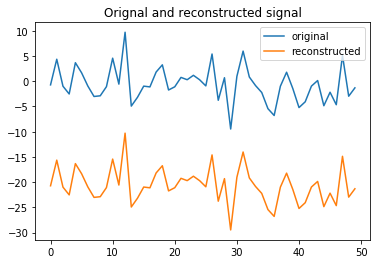

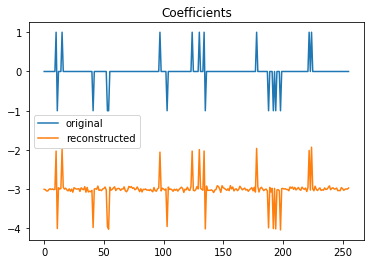

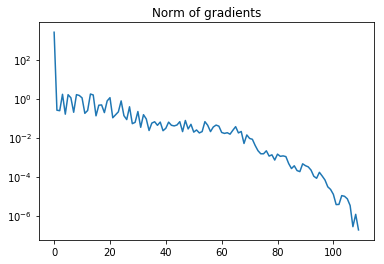

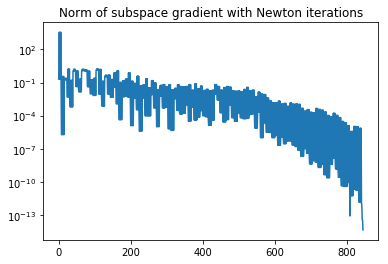

In [11]:
#main for Basic Pursuit
from scipy.linalg import hadamard
from scipy.sparse import random
import numpy as np

n = 2 ** 8
n1 = n
sparsity = 0.1
sigma_noise = 0.5
k = 2 * n

A = np.hstack([hadamard(n), np.eye(n)])
#A = hadamard(n)

c00 = np.sign(random(k, 1, density = sparsity, data_rvs = np.random.randn).A)   #  generate original vector of coefficients
x00 = np.matmul(A, c00)
y = x00 + sigma_noise*np.random.randn(n, 1)
c0 = np.random.rand(c00.shape[0], c00.shape[1])

x, u, _ = sesop(A, y, c0, l2norm, fast_smooth_approx, mult_norm, mult_adj)
plotting(x, y, A, n1, c00)

In [12]:
#globals for NN
quadrpenpar = 1e-1
nneurons = 10
eps_sigmoid = 0.7
N_of_train_samples = 260

In [13]:
def quadr(x, Z=np.array([]), isNew=True, nouts=1):

    m = quadrpenpar
    out = 0.5 * m * np.matmul(x.flatten().T, x.flatten())
    
    if nouts > 1:
        grad = m * x

        if nouts > 2:
            Hess = m * Z

            if nouts > 3:
                diag_elems = m * np.ones( ((x.flatten()).size(), 1) )
                
                return out, grad, Hess, diag_elems
            
            return out, grad, Hess
        
        return out, grad
        
    return out


In [14]:
def sigmoid(t, eps, isNew=True, nouts=1):
    if isNew:
        sigmoid.f_state = 1
        sigmoid.diff_state = 1
        sigmoid.f2_state = 1
    
    p = 1.0 / eps
    
    if sigmoid.f_state:
        sigmoid.pt = p * t
        u = np.abs(sigmoid.pt) # sigmoid is a derivative of out = eps.*(u-log(1+u))
        sigmoid.normed_u = 1.0 / (1 + u)
        out = sigmoid.pt * sigmoid.normed_u

        sigmoid.out_prev = out
        sigmoid.f_state = 0
    else:
        out = sigmoid.out_prev
        
    if nouts > 1:
        if sigmoid.diff_state:
            sigmoid.u2 = sigmoid.normed_u * sigmoid.normed_u
            diff = p * sigmoid.u2
            sigmoid.diff_prev = diff
            sigmoid.diff_state = 0
        else:
            diff = sigmoid.diff_prev
            
        if nouts > 2:
            if sigmoid.f2_state:
                diff2 = (-2 * p**2) * np.sign(sigmoid.pt) * sigmoid.u2 * sigmoid.normed_u
                sigmoid.diff2_prev = diff2
                sigmoid.f2_state = 0
            else:
                diff2 = sigmoid.diff2_prev
                
            return out, diff, diff2
            
        return out, diff
        
    return out

In [15]:
def weight_norm(V, y, Z=0, isNew=True, nouts=1):
    M = nneurons
    K = N_of_train_samples
    
    b_index = list(range(M * (K + 1) + 1, M * (K+2) + 1))
    v_index = list(range(0, M))

    c_index = M

    v = V[v_index]
    c = V[c_index]
    u = V[M + 1 : M + 1 + M * K]

    U = np.reshape(u, (M, K), order='F')
    b = V[b_index]
    
    I_1K = np.ones((1, K))
    I_K1 = np.ones((K, 1))
    
    U = U + np.matmul(b, I_1K) # Add bias
    
    if nouts == 1:
        sigm1 = sigmoid(U, eps_sigmoid, isNew, nouts=nouts)
        sigm1 = np.real(sigm1)
    elif nouts == 2:
        sigm1, sigm2 = sigmoid(U, eps_sigmoid, isNew, nouts=nouts)
        sigm1 = np.real(sigm1)
        sigm2 = np.real(sigm2)
    elif nouts == 3:
        sigm1, sigm2, sigm3 = sigmoid(U, eps_sigmoid, isNew, nouts=nouts)
        sigm1 = np.real(sigm1)
        sigm2 = np.real(sigm2)
        sigm3 = np.real(sigm3)

    L = np.matmul(v.T, sigm1).T + c - np.expand_dims(y.flatten(), -1)
    out = 0.5 * np.matmul(L.flatten().T, L.flatten())
    out = np.real(out)
    
    if nouts > 1:
        v_on_L = np.matmul(v, L.T)
        U_grad = v_on_L * sigm2
        grad_b = np.matmul(U_grad, I_K1)
        grad_out = np.vstack((np.matmul(sigm1, L), L.sum(axis = 0), np.expand_dims(U_grad.flatten(), -1), grad_b))
        grad_out = np.real(grad_out)
        
        if nouts > 2:
            J = Z.shape[1]
            Hess = np.zeros_like(Z)
            
            for j in range(0, J):
                z_v = np.expand_dims(Z[v_index, j], -1)
                z_c = np.expand_dims(Z[c_index, j], -1)
                z_b = np.expand_dims(Z[b_index, j], -1)

                z_u = Z[M + 1 : M + 1 + M * K, j]
                
                Z_u = np.reshape(z_u, U.shape, order='F') + z_b * I_1K
                Phi1Z_u = sigm2 * Z_u
                diff = (np.matmul(z_v.T, sigm1) + I_1K*z_c + np.matmul(v.T, Phi1Z_u)).T
                diff = np.real(diff)

                Hess_u = (np.matmul(z_v, L.T) + np.matmul(v, diff.T)) * sigm2 + v_on_L * sigm3 * Z_u

                Hess[0 : M, j] = np.squeeze(np.matmul(Phi1Z_u, L) + np.matmul(sigm1, diff))
                Hess[M + 1, j] = np.sum(diff, axis = 0)
                Hess[M + 1 : -M, j] = Hess_u.flatten()
                Hess[b_index, j] = np.squeeze(np.matmul(Hess_u, I_K1))
                Hess = np.real(Hess)
                
            return out, grad_out, Hess
        
        return out, grad_out
    
    return out

In [16]:
def layer(x2, x1):
    M = nneurons
    v = x1[0 : M]
    c = x1[M]
    w = x1[M + 1 : x1.shape[0]-M]
    b = x1[x1.shape[0]-M:]

    N, K = x2.shape # matrix x2:  N inputs (including ones) x2 K examples

    W = np.reshape(w, (nneurons, N), order='F')
    U = np.matmul(W, x2)
    return np.vstack((v, c, np.expand_dims(U.flatten(), -1), b))

In [17]:
def layer_transp(vcu, X):
    M = nneurons
    K = N_of_train_samples
    
    indv = list(range(0, M))
    indc = M
    indb = list(range((M * (K + 1) + 1), (M * (K + 2) +1)))

    v = vcu[indv]
    c = vcu[indc]
    b = vcu[indb]
    u = vcu[M + 1 : M + 1 + M * K]
    U = np.reshape(u, (M, K), order='F')
    
    W = np.matmul(U, X.T)
    return np.vstack((v, c, np.expand_dims(W.flatten(), -1), b))

In [18]:
def NURALNETWORK(x1, X):
    N, K = X.shape
    M = nneurons

    M = nneurons
    v = x1[0 : M]
    c = x1[M]
    w = x1[M + 1 : x1.shape[0]-M]
    b = x1[x1.shape[0]-M:]
    
    W = np.reshape(w, (M, N), order='F')
    
    Phi = sigmoid(np.matmul(W, X) + np.matmul(b, np.ones((1,K))), eps_sigmoid)
    y = np.matmul(v.T, Phi) + c
    return y

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:87: ComplexWarning: Casting complex values to real discards the imaginary part
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:88: C

(5.989755357604896+0j)


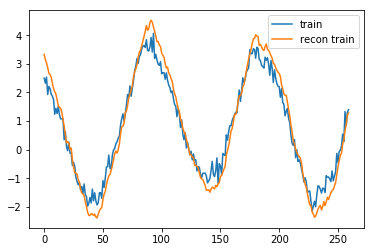

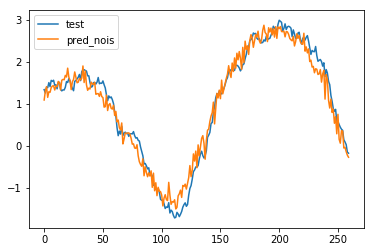

In [19]:
SigT = 300 # Signal length:   the same for training and test signal
delta = 20 #Half-interval around the reconstructed sample to be fed  into NN;
sigma_noise = 0.2 #Noise std in simulated data

tt = np.arange(0.02, 1.02, 1.0/SigT).T #Time running from 0 to 1

S00Train = np.expand_dims(np.cumsum(np.full((SigT, 1), 0.1 * np.random.randn(SigT, 1) ))  +  3 * np.sin(20 * tt), -1) # bumps + sinusoid
NoiseTrain = sigma_noise * np.random.randn(SigT, 1)
SnoisyTrain = S00Train + NoiseTrain

S00Test = np.expand_dims(np.cumsum(np.full((SigT, 1), 0.1 * np.random.randn(SigT, 1) ))  +  2 * np.sin(10 * tt), -1)
NoiseTset = sigma_noise * np.random.randn(SigT, 1)
SnoisyTest = S00Test + NoiseTset

K = SigT - 2 * delta #Number of training examples
L = 2 * delta + 1 #Interval around the reconstructed sample to be feed  into NN;

#Traini dataset

Xtrain = np.zeros((L, K))
ytrain = np.zeros((1, K))

k = -1
for t in range(delta, SigT - delta):
    k = k + 1
    Xtrain[0 : L, k] = np.squeeze(SnoisyTrain[t - delta:t + delta + 1] - SnoisyTrain[t])
    ytrain[0, k] = NoiseTrain[t]

#Test set 

Xtest = np.zeros((L, K))
ytest = np.zeros((1, K))

k = -1
for t in range(delta, SigT - delta):
    k = k + 1
    Xtest[0 : L, k] = np.squeeze(SnoisyTest[t - delta:t + delta + 1] - SnoisyTest[t])
    ytest[0, k] = SnoisyTest[t]

M = nneurons
N = Xtrain.shape[0]

v0 = (1.0/np.sqrt(M))*np.random.randn(M, 1)
c0 = 0
W0 = (1.0/np.sqrt(N))*np.random.randn(M, N)
b0 = 0.1*np.random.randn(M, 1)
vcwb0 = np.vstack((v0, c0, np.expand_dims(W0.flatten(), -1), b0))
vcwb = vcwb0

Wbc, _, ff = sesop(Xtrain, ytrain, vcwb0, weight_norm, quadr, layer, layer_transp)
Wbc = np.real(Wbc)
print(ff)

S_train = SnoisyTrain[delta:SigT-delta] - NURALNETWORK(Wbc, Xtrain).T
S_pred_Test  = SnoisyTest[delta:SigT-delta]  - NURALNETWORK(Wbc, Xtest).T

plt.figure(1)
plt.plot(S_train, label='train')
plt.plot(S00Train[delta:SigT-delta], label='recon train')
plt.legend()

plt.figure(2)
plt.plot(S00Test[delta:SigT-delta], label='test')
plt.plot(S_pred_Test, label='pred_nois')
plt.legend()


And also we implemented SESOP for neural network cost function optimization, to clean a signal from noise. The figures above shows the result of this denoising algorithm. The architecture was one hidden layer with 10 neurons in it. 